# Cálculo de Risco de Ações

In [1]:
# Importando Ferramentas Básicas
import math
import numpy              as np
import seaborn            as sns
import pandas             as pd
import matplotlib.pyplot  as plt

from scipy import stats

In [3]:
dataset = pd.read_csv('acoes.csv')

dataset.head()

,Date,GOL,CVC,WEGE,MAGALU,TOTS,BOVA
0,2015-01-02,14.99,15.20,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,11.811538,0.240000,10.995774,48.509998


## Cálculo dos retornos anuais

In [4]:
dataset.describe()

,GOL,CVC,WEGE,MAGALU,TOTS,BOVA
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1498.000000
mean,14.895486,32.327086,23.028168,5.361700,13.580716,73.072628
std,10.199643,16.053134,17.620213,6.978801,5.920666,20.775966
min,1.160000,6.490000,9.884615,0.030585,7.156402,36.450001
25%,6.907500,18.100000,12.707692,0.212500,9.836311,54.985000
50%,12.365000,27.825000,17.115383,2.462968,10.737931,72.000000
75%,20.987500,47.190001,22.400000,7.308594,15.290000,91.965000
max,43.790001,64.800003,92.209999,27.450001,31.070000,120.400002


In [5]:
dataset.CVC[dataset.Date == '2015-01-02'], dataset.CVC[dataset.Date == '2015-12-30']

(0    15.2
 Name: CVC, dtype: float64,
 245    13.5
 Name: CVC, dtype: float64)

In [7]:
# Taxa de Retorno Logarítimica
np.log(13.5/15.2) * 100

-11.86057424078469

In [9]:
dataset.MAGALU[dataset.Date == '2015-01-02'], dataset.MAGALU[dataset.Date == '2015-12-30']

(0    0.232812
 Name: MAGALU, dtype: float64,
 245    0.068945
 Name: MAGALU, dtype: float64)

In [100]:
def year_log_ret(df, year):
    dic = {}
    
    for stock in df.columns[1:]:
        dic['RL Anual ' + stock] = np.log(df[stock][df.Date == year + '-01-02']/df[stock][df.Date == year + '-12-30']) * 100
    return dic    

## Variância

<br>

O quanto os dados estão variando ao comparar com a média.

<br>

`Variância: (taxa de retorno - taxa de retorno média)^2 / N`

<br>

Sendo N o número de anos.

<br>

> Para quem não quer correr riscos, buscar variância menor.

In [129]:
# Em relação ao valor e n taxa de retorno
dataset.CVC.tail(330).var()

188.82227141212226

## Desvio Padrão

In [133]:
taxas_magalu = np.array([137,176,76,185.78,82.74,71.86,71.87])

variancia_magalu  = taxas_magalu.var()

desvio_padrao = math.sqrt(variancia_magalu)

In [134]:
desvio_padrao

47.04976631402202

In [135]:
#desvio padrão
dataset.CVC.tail(30).std()

0.874245833122633

## Coeficiente da Variação

<br>

`STD/Média`

## Cálculo Risco Médio Anual

<br>

Quanto maior o desvio padrão, maior o risco

In [5]:
dataset.drop(labels = 'Date', axis = 1, inplace = True)

dataset.head()

,GOL,CVC,WEGE,MAGALU,TOTS,BOVA
0,14.99,15.20,11.846153,0.232812,11.910702,47.259998
1,14.85,15.00,11.926923,0.237187,11.544731,46.320000
2,15.21,14.80,11.750000,0.234062,10.822770,46.580002
3,14.55,14.67,11.615384,0.241875,10.746248,48.150002
4,14.27,14.15,11.811538,0.240000,10.995774,48.509998


In [6]:
# taxa de retorno simples
taxas_ret = (dataset /dataset.shift(1)) - 1

taxas_ret

,GOL,CVC,WEGE,MAGALU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
1497,-0.028099,-0.028964,-0.023923,0.005478,0.004613,-0.027304
1498,0.011480,0.019211,0.051186,0.024728,0.017308,0.007833
1499,-0.023119,-0.014385,-0.028305,-0.015133,0.025000,-0.009058
1500,-0.016781,-0.002516,-0.008929,0.055648,0.011518,-0.004843


In [10]:
# variação em reais no tempo todo - desvio padrão

taxas_ret.std() * 100

GOL       5.126102
CVC       3.491971
WEGE      2.230142
MAGALU    4.164206
TOTS      2.434172
BOVA      1.714609
dtype: float64

In [9]:
# desvio padraõ anual

taxas_ret.std() * 246

GOL       12.610212
CVC        8.590250
WEGE       5.486149
MAGALU    10.243946
TOTS       5.988063
BOVA       4.217939
dtype: float64

In [11]:
# Anualizar
taxas_ret.std() * math.sqrt(246)

GOL       0.803998
CVC       0.547694
WEGE      0.349784
MAGALU    0.653130
TOTS      0.381785
BOVA      0.268926
dtype: float64

In [13]:
#covariância

'''
>0, se movem juntas
<0, se movem em direções opostas
=0, são independentes
'''

taxas_ret.cov() 

,GOL,CVC,WEGE,MAGALU,TOTS,BOVA
GOL,0.002628,0.000904,0.000353,0.000679,0.000383,0.000519
CVC,0.000904,0.001219,0.000234,0.000460,0.000258,0.000333
WEGE,0.000353,0.000234,0.000497,0.000274,0.000209,0.000204
MAGALU,0.000679,0.000460,0.000274,0.001734,0.000293,0.000321
TOTS,0.000383,0.000258,0.000209,0.000293,0.000593,0.000202
BOVA,0.000519,0.000333,0.000204,0.000321,0.000202,0.000294


In [15]:
# correlações
''' 
0,00 a +- 0,19   - Bem Fraca
0,20 a +- 0,39   - Fraca
0,40 a +- 0,69   - Moderada
0,70 a +- 0,89   - Forte
0,90 a +- 1,00   - Muito Forte
'''
taxas_ret.corr()

,GOL,CVC,WEGE,MAGALU,TOTS,BOVA
GOL,1.000000,0.504974,0.308965,0.318228,0.307218,0.589189
CVC,0.504974,1.000000,0.300514,0.316586,0.303142,0.557833
WEGE,0.308965,0.300514,1.000000,0.295293,0.385604,0.532981
MAGALU,0.318228,0.316586,0.295293,1.000000,0.289047,0.448494
TOTS,0.307218,0.303142,0.385604,0.289047,1.000000,0.483479
BOVA,0.589189,0.557833,0.532981,0.448494,0.483479,1.000000


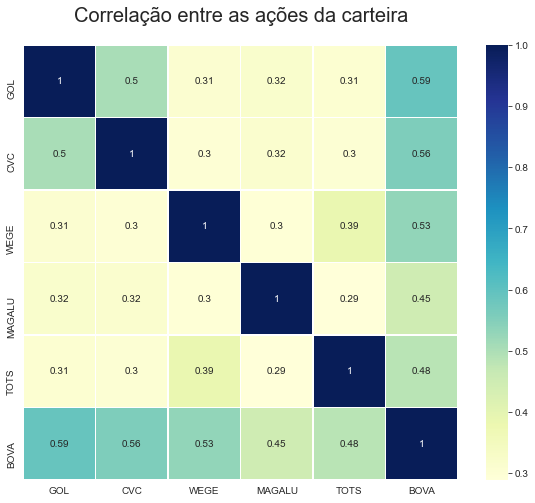

In [32]:
sns.set_style('darkgrid')

plt.figure(figsize = (10,8))
sns.heatmap(taxas_ret.corr(),
           cmap = "YlGnBu",
           linewidths= 0.5,
           annot= True,
           square= True)
plt.title('Correlação entre as ações da carteira', size = 20, y = 1.04);

## Risco de um portifólio

In [34]:
# Somente duas ações
taxas_ret_gol_cvc = taxas_ret.drop(columns = ['WEGE', 'MAGALU', 'TOTS', 'BOVA'])

taxas_ret_gol_cvc.head()

,GOL,CVC
0,NaN,NaN
1,-0.009340,-0.013158
2,0.024242,-0.013333
3,-0.043392,-0.008784
4,-0.019244,-0.035447


In [35]:
# covariância
taxas_ret_gol_cvc.cov() * 246

,GOL,CVC
GOL,0.646412,0.222363
CVC,0.222363,0.299969


In [36]:
pesos = np.array([0.5,0.5])

In [37]:
np.dot(taxas_ret_gol_cvc.cov() * 246, pesos)

array([0.43438755, 0.26116591])

In [38]:
#valor da variância
np.dot(np.dot(taxas_ret_gol_cvc.cov() * 246, pesos), pesos)

0.3477767316937551

In [39]:
# desvio padrão - volatilidade da carteira
math.sqrt(np.dot(np.dot(taxas_ret_gol_cvc.cov() * 246, pesos), pesos)) * 100

58.972598017533116

## Todas as ações

In [43]:
pesos1 = np.array([0.2,0.2,0.2,0.2,0.2,0.0])
# volatilidade
math.sqrt(np.dot(np.dot(taxas_ret.cov() * 246, pesos1), pesos1)) * 100

38.120144450044045

In [45]:
# Agora comparando com a variância da BOVA
pesos2 = np.array([0,0,0,0,0,1])
np.dot(pesos2, np.dot(pesos2, taxas_ret.cov() * 246)) * 100

7.232117717142337

In [53]:
# Volatilidade da BOVA
math.sqrt(taxas_ret.BOVA.var()) * 100 * math.sqrt(246)

26.892596968575454

In [51]:
# Mesma conta
math.sqrt(np.dot(pesos2, np.dot(pesos2, taxas_ret.cov() * 246))) * 100

26.892596968575454

## Risco Sistemático e Não Sistemático

<br>

`Sistemático: mudança diária no preço das ações, devido a eventos como recessão, comportamento do cliente`
<br>

`Não Sistemático: Eventos Específicos na empresa`


In [56]:
# Só dá para calcular o sistemático

# variancia anual
variancia_pesos1  = (taxas_ret.var() * 246)  * pesos1
variancia_pesos1

GOL       0.129282
CVC       0.059994
WEGE      0.024470
MAGALU    0.085316
TOTS      0.029152
BOVA      0.000000
dtype: float64

In [64]:
sub1 = variancia_pesos1[0]
for i in range(1,5):
    sub1 -= variancia_pesos1[i]
    
sub1

-0.0696488681228894

In [ ]:
var